## IMPORTAÇÃO DAS BIBLIOTECAS

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import cv2

## ESCALONAMENTO DOS DADOS
Escala em Grupo
 #### MÉDIA
$$ \mu_{j}=\frac{1}{IK}\sum_{i=1}^{I}\sum_{k=1}^{K} x_{ijk}  $$
#### VARIÂNCIA
$$\sigma_{j}^{2}=\frac{1}{IK}\sum_{i=1}^{I}\sum_{k=1}^{K}(x_{ijk}-\mu_{j})^2 $$
#### VARIÁVEL COM NOVA ESCALA
$$ x_{ij}=\frac{x_{ij}-\mu_{jk}}{\sigma_{j}}  $$

I = número de experimentos (linhas da matriz)

K = quantidade de amostras em cada experimento

J = quantidade de sensores

##  MATRIZ DE COVARIÂNCIA


$$C_x=\frac{1}{n-1}X^TX $$

## REDUÇÃO DA DIMENSIONALIDADE 
A dimensão dos dados pode ser reduXida escolhendo apenas os primeiros autovalores, pois estão associados a autovetores que representam as direções de maior variância.

## TRANSFORMAÇÃO DA MATRIX DE DADOS
 O objetivo do PCA e expressar os dados em um nova base onde eles são arrumados em direções de máxima variância e covariância nula 

A matriX **P contém as componentes principais**. Essas componentes são os autovetores dispostos ao longo das colunas da matriX P. Os autovalores são organiXados em ordem decrescente juntamente com seus respectivos autovalores, pois autovetores com maiores autovalores representam padrões com maiores quantidades de informações


Os dados transformados são representados pela matriX **T :**





$$ T=XP $$
A matriX de dados X deve ser composta pelos **valores com nova escala**

>Os dados transformados devem ser descorrelacionados, portanto, os valores fora da diagonal principal da matriz de covariâcia de T devem ser nulos. A diagonal principal é formada pelos autovalores

$$C_T=\frac{1}{n-1}T^TT = diagonal$$ 



## ÍNDICES PARA IDENTIFICAÇÃO DO DANO

$$ T_{j}^{2}= \sum_{j=1}^{r}\frac{t_{si}}{\lambda_{j}}=t_{si}\Lambda^{-1}t_{si}^{T}=x_{i}P\Lambda^{-1}P^{T}x_{i}^{T} $$



$$ Q_{i}=\tilde{x}_{i}\tilde{x}_{i}^{T}=x_{i}(I-PP^{T})x_{i}^{T} $$


Os índices são calculados para cada experimento I da fase de testes

## REFERÊNCIAS


JOLLIFE, Ian T.; CADIMA, Jorge. Principal component analXsis: A review and recent developments. [S. l.]: RoXal SocietX of London, 2016. 

MUJICA, L. E. et al. A structural damage detection indicator based on principal component analXsis and statistical hXpothesis testing. Smart Materials and Structures, [s. l.], v. 23, n. 2, 2014. 

MUJICA, L. E. et al. Q-statistic and t2-statistic pca-based measures for damage assessment in structures. Structural Health Monitoring, [s. l.], v. 10, n. 5, p. 539–553, 2011. 

TIBADUIZA et al. Combined and I Indices Based on Principal Component AnalXsis for Damage Detection and Localization. [S. l.: s. n.], [s. d.]. 

### IMPORTAÇÃO DOS DADOS

<Axes: >

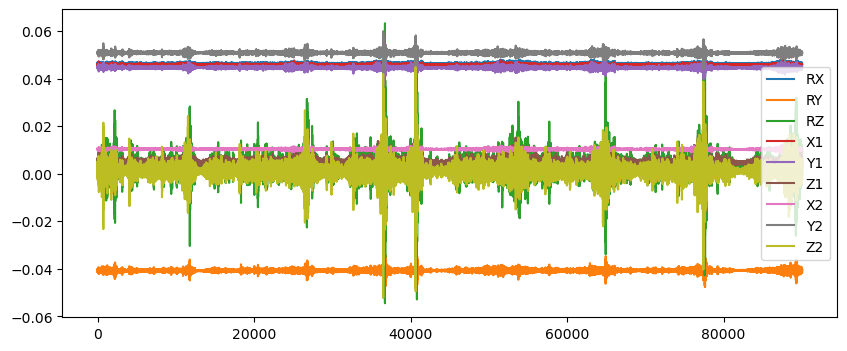

In [27]:
# Dados treinamento
df1 = pd.read_csv('16-10-21-22h.txt')
df2 = pd.read_csv('16-10-21-23h.txt')
df3 = pd.read_csv('17-10-21-00h.txt')
df4 = pd.read_csv('17-10-21-01h.txt')
df5 = pd.read_csv('17-10-21-02h.txt')
df6 = pd.read_csv('17-10-21-03h.txt')
df7 = pd.read_csv('17-10-21-04h.txt')
df8 = pd.read_csv('17-10-21-05h.txt')
df9 = pd.read_csv('17-10-21-06h.txt')
df10 = pd.read_csv('17-10-21-07h.txt')
df11 = pd.read_csv('17-10-21-08h.txt')
df12 = pd.read_csv('17-10-21-09h.txt')
df13 = pd.read_csv('17-10-21-10h.txt')
df14 = pd.read_csv('17-10-21-11h.txt')
df15 = pd.read_csv('17-10-21-12h.txt')

# Dados teste
dft = pd.read_csv('S5_teste.txt')
dft = dft.iloc[:len(df1)]                  #pareamento da quantidade de linhas entre teste e treinamento

dft.plot(figsize=(10,4))

In [3]:
# Acelerações dispostas em vetores linha (conjunto treinamento)
dfx = np.vstack([df1['X'],df2['X'],df3['X'],df4['X'],df5['X'],df6['X'],df7['X'],df8['X'],df9['X'],df10['X'],df11['X'],df12['X'],df13['X'],df14['X'],df15['X']])
dfy = np.vstack([df1['Y'],df2['Y'],df3['Y'],df4['Y'],df5['Y'],df6['Y'],df7['Y'],df8['Y'],df9['Y'],df10['Y'],df11['Y'],df12['Y'],df13['Y'],df14['Y'],df15['Y']])
dfz = np.vstack([df1['Z'],df2['Z'],df3['Z'],df4['Z'],df5['Z'],df6['Z'],df7['Z'],df8['Z'],df9['Z'],df10['Z'],df11['Z'],df12['Z'],df13['Z'],df14['Z'],df15['Z']])

#Conjunto treinamento
dfx = np.array(dfx)
dfy = np.array(dfy)
dfz = np.array(dfz)

#Conjunto teste
dftx = np.vstack([dft.iloc[:,0],dft.iloc[:,3],dft.iloc[:,6]])
dfty = np.vstack([dft.iloc[:,1],dft.iloc[:,4],dft.iloc[:,7]])
dftz = np.vstack([dft.iloc[:,2],dft.iloc[:,5],dft.iloc[:,8]])

# print(dfx.shape,dfy.shape,dfz.shape,dftx.shape,dfty.shape,dftz.shape)

### Visualização das frequências do conjunto de treinamento

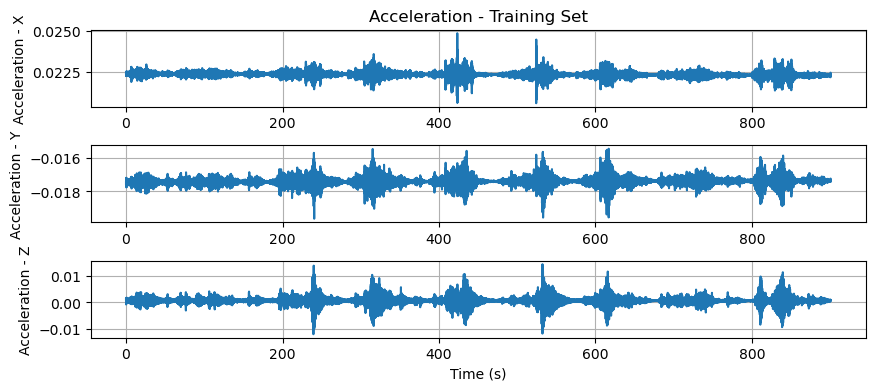

In [4]:
# Cálculo das frequências
t = df1['Time']                            
T = t[1] - t[0]                         # intervalo de amostragem
l,c = dfx.shape

n = 3                                   # n = 0 a 14   (escolha da leitura a ser vizualizada (22h a 12h))             

plt.figure(figsize = (10,4))

plt.subplot(3,1,1)
plt.plot(t, dfx[n,:])
# plt.xlabel('Time (s)')
plt.ylabel('Acceleration - X')
plt.title('Acceleration - Training Set')
plt.grid(True)

plt.subplot(3,1,2)
plt.plot(t, dfy[n,:])
# plt.xlabel('Time (s)')
plt.ylabel('Acceleration - Y')
plt.grid(True)

plt.subplot(3,1,3)
plt.plot(t, dfz[n,:])
plt.xlabel('Time (s)')
plt.ylabel('Acceleration - Z')
plt.grid(True)

plt.subplots_adjust(wspace=0.1, hspace=0.5)

### Visualização das frequências do conjunto de teste

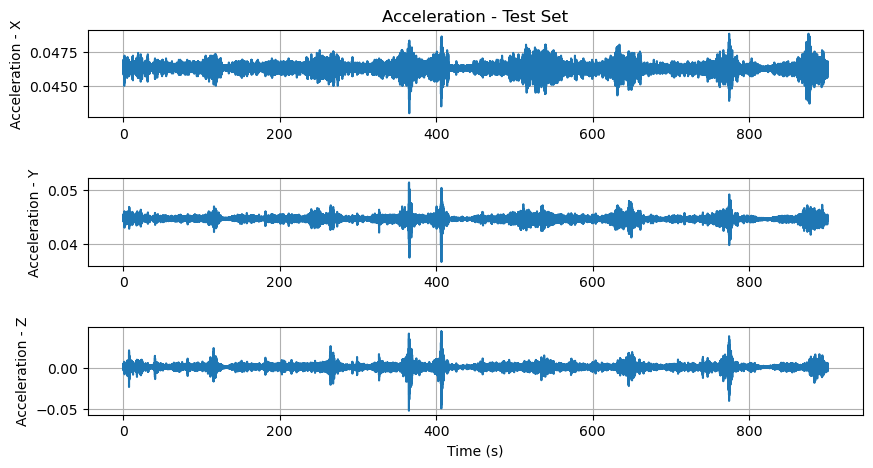

In [5]:
plt.figure(figsize = (10,5))

plt.subplot(3,1,1)
plt.plot(t, dftx[0,:])
# plt.xlabel('Time (s)')
plt.ylabel('Acceleration - X')
plt.title('Acceleration - Test Set')
plt.grid(True)

plt.subplot(3,1,2)
plt.plot(t, dfty[1,:])
# plt.xlabel('Time (s)')
plt.ylabel('Acceleration - Y')
plt.grid(True)

plt.subplot(3,1,3)
plt.plot(t, dftz[2,:])
plt.xlabel('Time (s)')
plt.ylabel('Acceleration - Z')
plt.grid(True)

plt.subplots_adjust(wspace=0.1, hspace=0.7)

### PSD Conjunto de treinamento

Text(0.5, 1.0, 'PSD - Direction X (Training Set)')

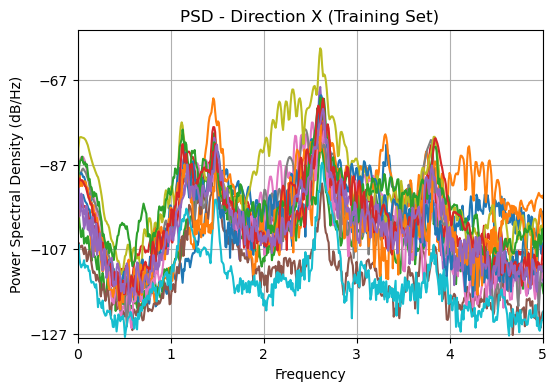

In [6]:
# Densidade espectral conjunto de treinamento
psx = []            #densidade espectral direção x
psy = []            #densidade espectral direção y
psz = []            #densidade espectral direção z

plt.figure(figsize = (6,4))

for i in range(l):
    px,fx = plt.psd(dfx[i,:], NFFT = 10000, detrend='linear', Fs=1/T)
    psx.append(px)


plt.xlim([0,5])
plt.ylim([-128,-55])
plt.title('PSD - Direction X (Training Set)')

Text(0.5, 1.0, 'PSD - Direction Y (Training Set)')

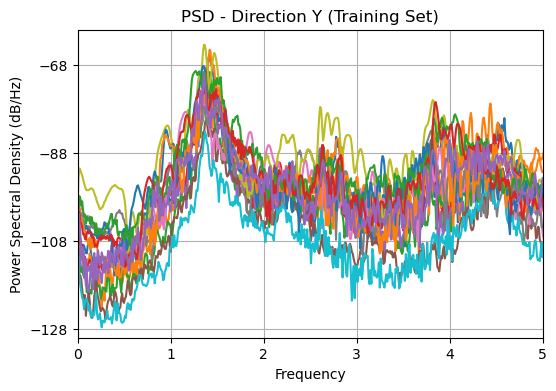

In [7]:
plt.figure(figsize = (6,4))

for i in range(l):
    py,fy = plt.psd(dfy[i,:], NFFT = 10000, detrend='linear', Fs=1/T)
    psy.append(py)

plt.xlim([0,5])
plt.ylim([-130,-60])
plt.title('PSD - Direction Y (Training Set)')

Text(0.5, 1.0, 'PSD - Direction Z (Training Set)')

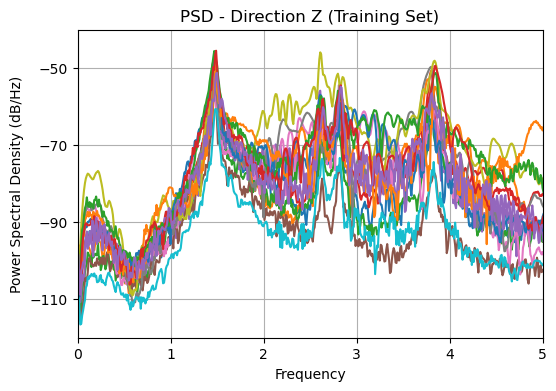

In [8]:
plt.figure(figsize = (6,4))

for i in range(l):
    pz,fz = plt.psd(dfz[i,:], NFFT = 10000, detrend='linear', Fs=1/T)    
    psz.append(pz)

plt.xlim([0,5])
plt.ylim([-120,-40])
plt.title('PSD - Direction Z (Training Set)')

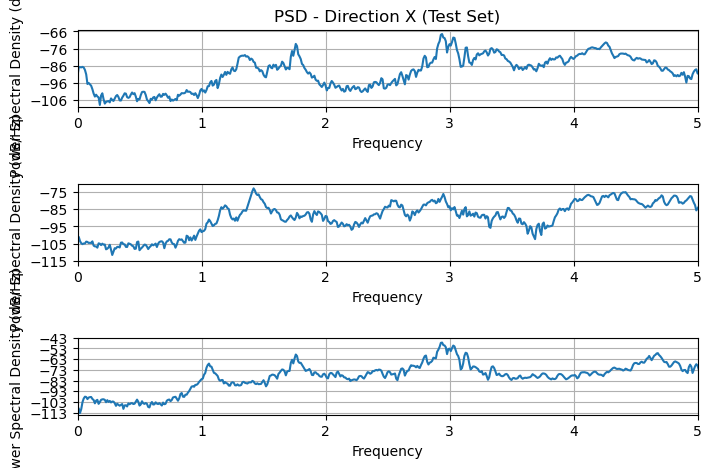

In [9]:
plt.figure(1,figsize = (8,5))

plt.subplot(3,1,1)
plt.title('PSD - Direction X (Test Set)')
ptx,fz = plt.psd(dftx[0,:], NFFT = 10000, detrend='linear', Fs=1/T)
plt.xlim([0,5])
plt.ylim([-110,-65]) 

plt.subplot(3,1,2)
pty,fz = plt.psd(dfty[0,:], NFFT = 10000, detrend='linear', Fs=1/T) 
plt.xlim([0,5])
plt.ylim([-115,-70])

plt.subplot(3,1,3)
ptz,fz = plt.psd(dftz[0,:], NFFT = 10000, detrend='linear', Fs=1/T) 
plt.xlim([0,5])
plt.ylim([-115,-43])

plt.subplots_adjust(wspace = 0,hspace = 1)

### PSD Conjunto de teste

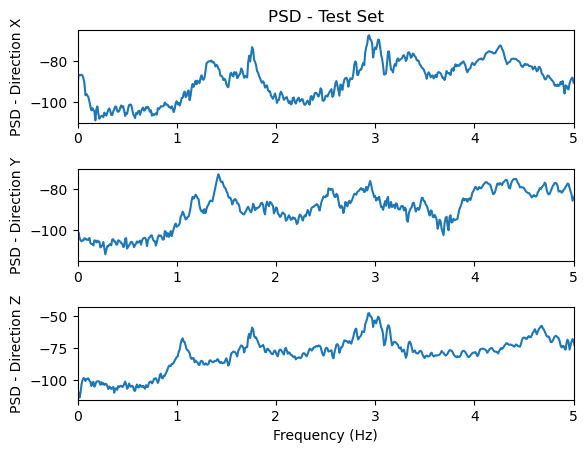

In [10]:
plt.subplot(3,1,1)
plt.plot(fx,10*np.log10(ptx))
plt.xlim([0,5])
plt.ylim([-110,-65]) 
plt.ylabel('PSD - Direction X')
plt.title('PSD - Test Set')

plt.subplot(3,1,2)
plt.plot(fy,10*np.log10(pty))
plt.xlim([0,5])
plt.ylim([-115,-70])
plt.ylabel('PSD - Direction Y')

plt.subplot(3,1,3)
plt.plot(fz,10*np.log10(ptz))
plt.xlim([0,5])
plt.ylim([-115,-43])
plt.ylabel('PSD - Direction Z')
plt.xlabel('Frequency (Hz)')

plt.subplots_adjust(wspace =0, hspace = 0.5)

### Comparação das PSD entre treinamento e teste

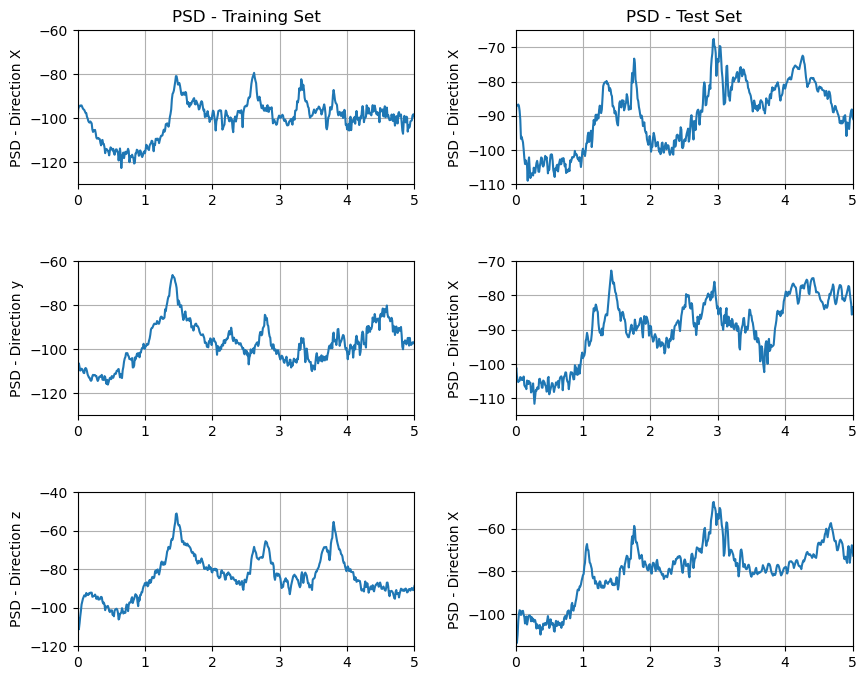

In [11]:
psx = np.array(psx)
psy = np.array(psy)
psz = np.array(psz)

n = 0

plt.figure(figsize = (10,8))
plt.subplot(3,2,1)
plt.plot(fx,10*np.log10(psx[n,:]))
plt.xlim([0,5])
plt.ylim([-130,-60])
plt.ylabel('PSD - Direction X')
plt.grid(True)
plt.title('PSD - Training Set')

plt.subplot(3,2,3)
plt.plot(fy,10*np.log10(psy[n,:]))
plt.xlim([0,5])
plt.ylim([-130,-60])
plt.ylabel('PSD - Direction y')
plt.grid(True)

plt.subplot(3,2,5)
plt.plot(fz,10*np.log10(psz[n,:]))
plt.xlim([0,5])
plt.ylim([-120,-40])
plt.ylabel('PSD - Direction z')
plt.grid(True)

plt.subplot(3,2,2)
plt.plot(fx,10*np.log10(ptx))
plt.xlim([0,5])
plt.ylim([-110,-65]) 
plt.ylabel('PSD - Direction X')
plt.title('PSD - Test Set')
plt.grid(True)

plt.subplot(3,2,4)
plt.plot(fy,10*np.log10(pty))
plt.xlim([0,5])
plt.ylim([-115,-70])
plt.ylabel('PSD - Direction X')
plt.grid(True)


plt.subplot(3,2,6)
plt.plot(fz,10*np.log10(ptz))
plt.xlim([0,5])
plt.ylim([-115,-43]) 
plt.ylabel('PSD - Direction X')
plt.grid(True)

plt.subplots_adjust(wspace = 0.3,hspace = 0.5)

### APLICAÇÃO DO PCA NOS DADOS DE TREINAMENTO

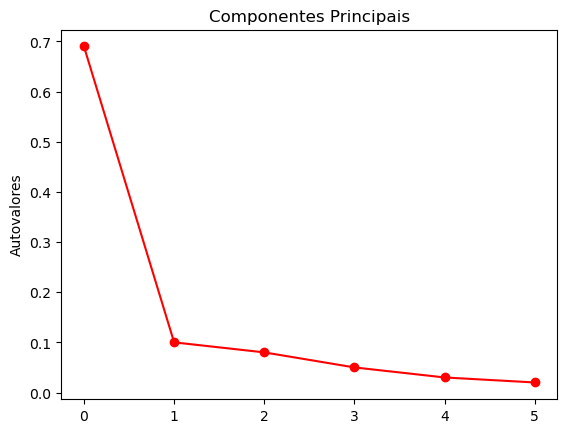

Autovalores (variação explicada):
[0.69 0.1  0.08 0.05 0.03 0.02]

Variação explicada acumulada:
[0.68890854 0.78698588 0.86212282 0.9099624  0.94324287 0.96056603]


In [12]:
scaler = StandardScaler()

X_px = scaler.fit_transform(psx.T)          #dados padronizados  (média zero e desvio padrão unitário)
X_py = scaler.fit_transform(psy.T)          #dados padronizados  (média zero e desvio padrão unitário)
X_pz = scaler.fit_transform(psz.T)          #dados padronizados  (média zero e desvio padrão unitário)

# PCA
pca_x = PCA(n_components=6)
pca_x.fit(X_px)                             #autovetores
X_pcax = pca_x.fit_transform(X_px)          #dados de treinamento transformados

pca_y = PCA(n_components=6)              
pca_y.fit(X_py)                             #autovetores
X_pcay = pca_y.fit_transform(X_py)          #dados de treinamento transformados

pca_z = PCA(n_components=6)
pca_z.fit(X_pz)                             #autovetores  
X_pcaz = pca_z.fit_transform(X_pz)          #dados de treinamento transformados
X_origz = pca_z.inverse_transform(X_pcaz)

# Os autovetores são os componentes principais
vec_x = pca_x.components_
vec_y = pca_y.components_
vec_z = pca_z.components_

# Os autovalores podem ser calculados a partir das variâncias explicadas
autovalores_x = np.round(pca_x.explained_variance_ratio_, 2)
autovalores_y = np.round(pca_y.explained_variance_ratio_, 2)
autovalores_z = np.round(pca_z.explained_variance_ratio_, 2)

plt.plot(autovalores_z,'ro-')
#plt.xlabel('Componentes Principais')
plt.ylabel('Autovalores')
plt.title('Componentes Principais')
plt.show()

# print("Componentes principais:")
# print(X_pca)
# print()

# print("Padronizados:")
# print(X_p)
# print()

# print("Autovetores (componentes principais):")
# print(autovetores)
# print()

print("Autovalores (variação explicada):")
print(autovalores_z)
print()
print("Variação explicada acumulada:")
print(pca_z.explained_variance_ratio_.cumsum())

C:\Users\lopes\AppData\Local\Temp\ipykernel_3528\2857929909.py:3: RuntimeWarning: invalid value encountered in log10
  plt.plot(10*np.log10(X_pcaz))
C:\Users\lopes\AppData\Local\Temp\ipykernel_3528\2857929909.py:12: RuntimeWarning: invalid value encountered in log10
  plt.plot(fz,10*np.log10(X_origz))


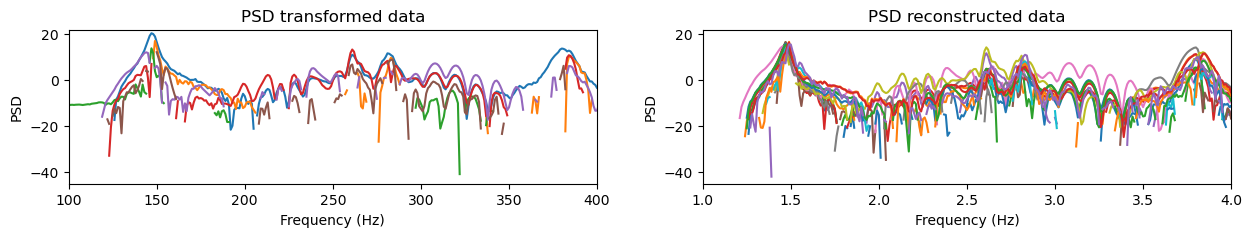

In [13]:
plt.figure(figsize = (15,2))
plt.subplot(1,2,1)
plt.plot(10*np.log10(X_pcaz))
# plt.ylim([-30,30])
plt.xlim([100,400])
plt.title('PSD transformed data')
plt.ylim([-45,22])
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD')

plt.subplot(1,2,2)
plt.plot(fz,10*np.log10(X_origz))
plt.xlim([1,4])
plt.title('PSD reconstructed data')
plt.ylim([-45,22])
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD')

plt.subplots_adjust(wspace =0.2,hspace = 0)

C:\Users\lopes\AppData\Local\Temp\ipykernel_3528\3405767635.py:4: RuntimeWarning: invalid value encountered in log10
  plt.plot(fz,10*np.log10(X_pcaz[:,0]))


Text(0, 0.5, 'PSD')

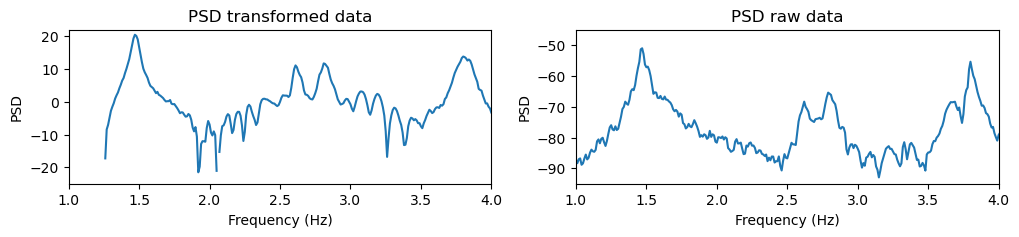

In [14]:
plt.figure(figsize = (12,2))

plt.subplot(1,2,1)
plt.plot(fz,10*np.log10(X_pcaz[:,0]))
plt.xlim([1,4])
plt.ylim([-25,22])
plt.title('PSD transformed data')
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD')

plt.subplot(1,2,2)
plt.plot(fz,10*np.log10(psz[0,:]))
plt.xlim([1,4])
plt.ylim([-95,-45])
plt.title('PSD raw data')
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD')


### APLICAÇÃO DO PCA NOS DADOS DE TESTE

In [15]:
Xtest = np.array([ptx,pty,ptz])

Xt_p = scaler.fit_transform(Xtest.T)          #dados padronizados  (média zero e desvio padrão unitário)

Xt_x = pca_x.transform(Xt_p[:,0])
Xt_y = pca_y.transform(pty)
Xt_z = pca_z.transform(ptz)




ValueError: Expected 2D array, got 1D array instead:
array=[-0.19515912  0.06403237  0.05642677 ... -0.29827623 -0.29810106
 -0.29982098].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
ptx.shape

(5001,)

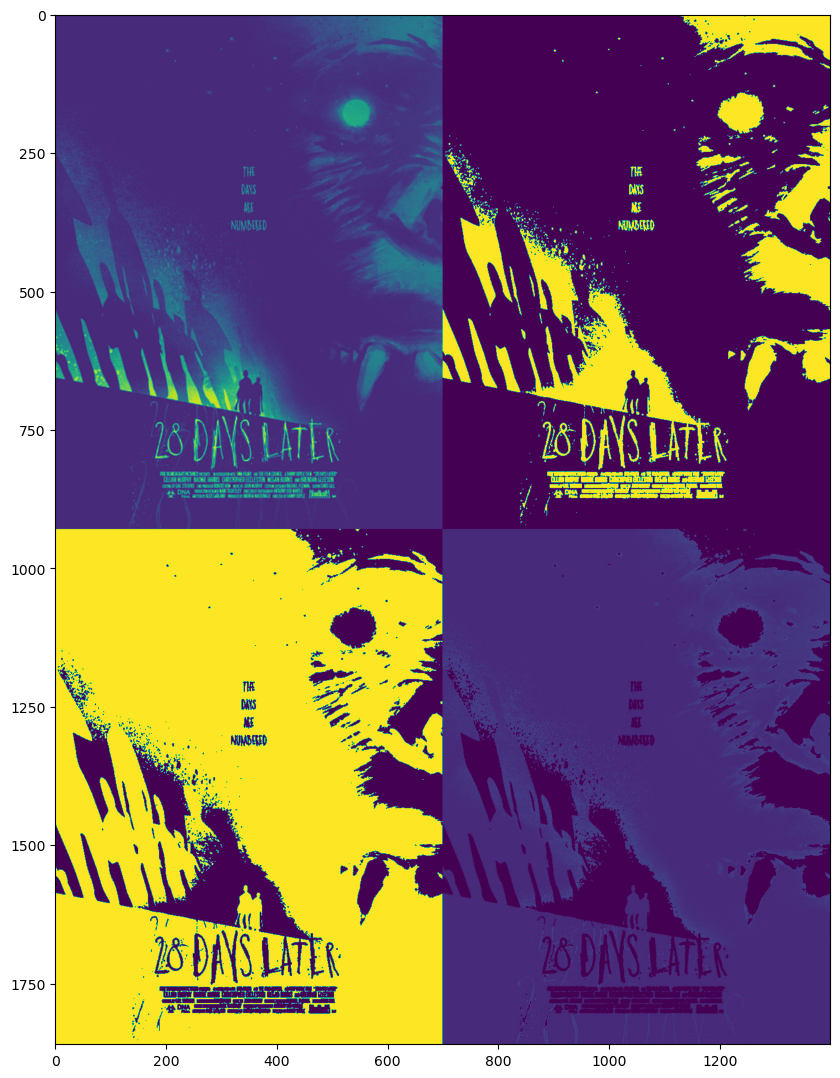

In [ ]:
X = plt.imread('imagem.jpg')

plt.figure(figsize = (10,15))
plt.imshow(X)


In [ ]:
pca = PCA(0.95)
x = pca.fit_transform(X)

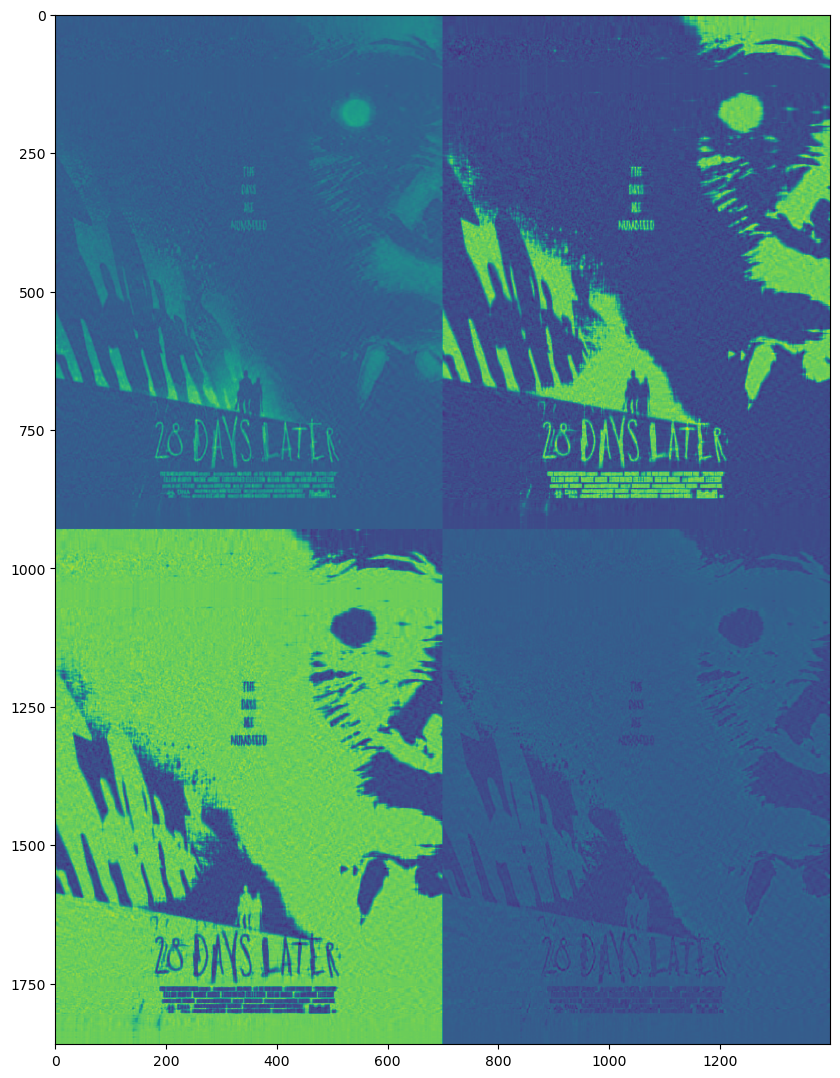

In [ ]:
img = pca.inverse_transform(x)

plt.figure(figsize = (10,15))
plt.imshow(img)


In [ ]:
print(img.shape,x.shape)

(1860, 1400) (1860, 123)


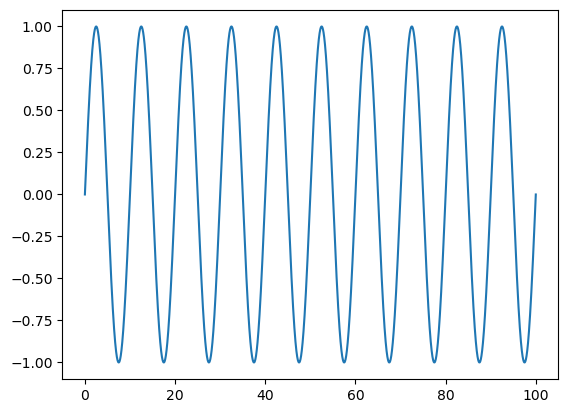

In [ ]:
def seno_tempo(freq, duracao, taxa_amostragem=1000):
    t = np.linspace(0., duracao, int(taxa_amostragem * duracao))
    sinal = np.sin(2 * np.pi * freq * t)
    return t, sinal

# Uso da função
t, sinal = seno_tempo(0.1, 100)

# Plot do sinal
plt.plot(t, sinal)
plt.show()

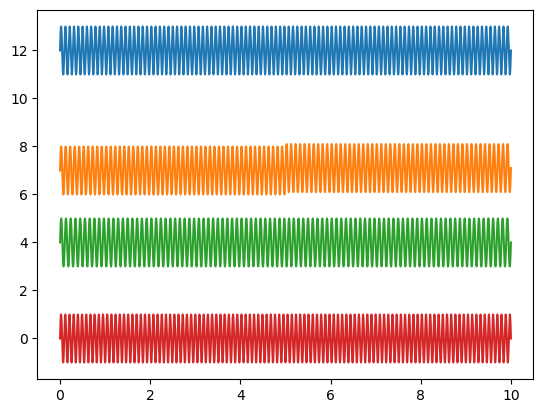

In [ ]:
taxa = 100
duracao = 200

t = np.linspace(0., 10, int(taxa* duracao))
freq = 10

sinal1 = np.sin(2.1 * np.pi * freq * t)+12
sinal2 = np.sin(2 * np.pi * freq * t) + np.array([0 if i < 10000 else 0.1 for i in range(len(t))])+7
sinal3 = np.sin(1.9 * np.pi * freq * t)+4
sinal4 = np.sin(2.15 * np.pi * freq * t)
# y = np.array([0 if i < 8000 else 1 for i in range(len(t))])
plt.plot(t,sinal1,t,sinal2,t,sinal3,t,sinal4)

Xs1 = np.array(sinal1)
Xs2 = np.array(sinal2)
Xs3 = np.array(sinal3)
Xs4 = np.array(sinal4)

Xs = np.array([sinal1,sinal2,sinal3,sinal4])


[0.49943231 0.99806111 1.         1.        ]
(20000, 4)


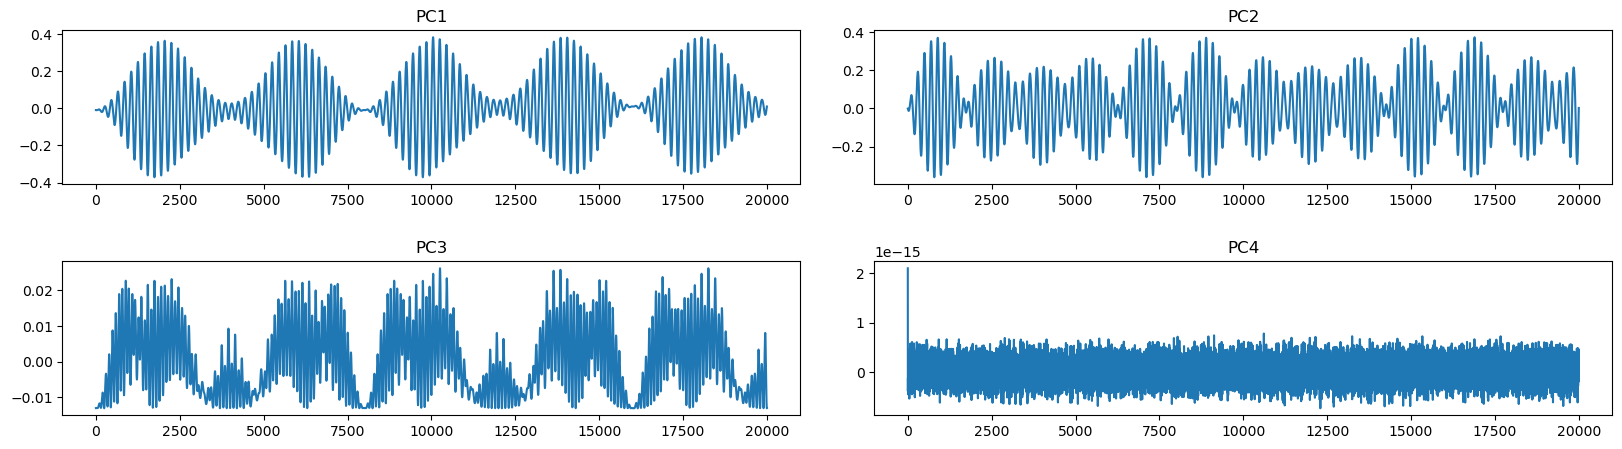

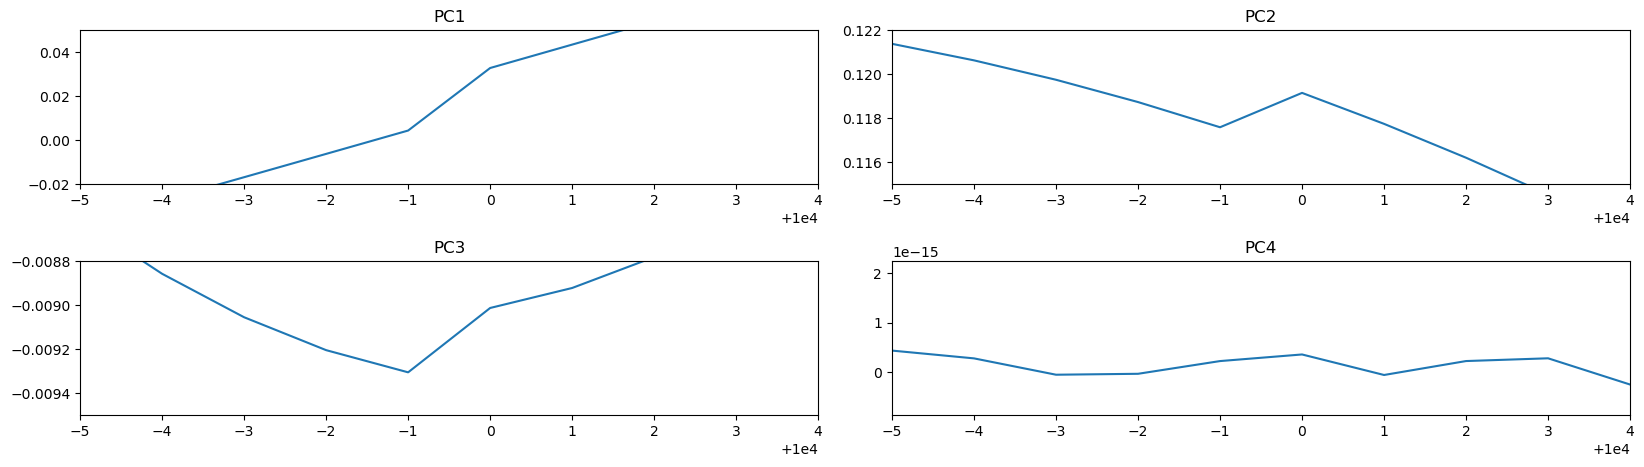

In [ ]:
scaler= StandardScaler()

X_ps = scaler_x.fit_transform(Xs)     #dados padronizados  (média zero e desvio padrão unitário)

# PCA
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_ps.T)

# Os autovetores são os componentes principais
autovetores_x = pca.components_

# Os autovalores podem ser calculados a partir das variâncias explicadas
autovalores = np.round(pca.explained_variance_ratio_, 2)

print(pca.explained_variance_ratio_.cumsum())

plt.figure(1,figsize = (20,5))
plt.subplot(2,2,1)
plt.title('PC1')
plt.plot(X_pca[:,0])
plt.subplot(2,2,2)
plt.title('PC2')
plt.plot(X_pca[:,1])
plt.subplot(2,2,3)
plt.title('PC3')
plt.plot(X_pca[:,2])
plt.subplot(2,2,4)
plt.title('PC4')
plt.plot(X_pca[:,3])
plt.subplot(2,2,4)
plt.subplots_adjust(wspace=0.1, hspace=0.5)

plt.figure(2,figsize = (20,5))
plt.subplot(2,2,1)
plt.title('PC1')
plt.plot(X_pca[:,0])
plt.xlim([9995,10004])
plt.ylim([-0.02,0.05])
plt.subplot(2,2,2)
plt.title('PC2')
plt.plot(X_pca[:,1])
plt.xlim([9995,10004])
plt.ylim([0.115,0.122])
plt.subplot(2,2,3)
plt.title('PC3')
plt.plot(X_pca[:,2])
plt.xlim([9995,10004])
plt.ylim([-0.0095,-0.0088])
plt.subplot(2,2,4)
plt.title('PC4')
plt.plot(X_pca[:,3])
plt.xlim([9995,10004])
plt.subplots_adjust(wspace=0.1, hspace=0.5)

print(X_pca.shape)

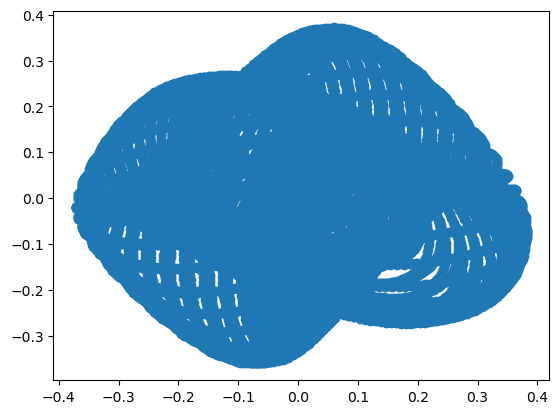

In [ ]:
plt.scatter(X_pca[:,0],X_pca[:,1])